In [6]:
import src.io as io
io

<module 'src.io' from '/Users/jells_b/Dev/Chord-based_Melody_Generation/src/io.py'>

In [7]:
import os
import json
import collections
import music21 as mc

In [8]:
PATH_DATA = '../data'

PATH_DATA_INTERIM = os.path.join(PATH_DATA, 'interim')
FILENAME = "parsed.json"

os.listdir(PATH_DATA_INTERIM)

['parsed.json', '.gitkeep']

In [9]:
with open(os.path.join(PATH_DATA_INTERIM, FILENAME), 'r') as handle:
    parsed_data = json.load(handle)

In [10]:
parsed_data.keys()

dict_keys(['notes', 'chords', 'parse_success', 'parse_failures', 'info'])

In [11]:
ARTIST = 'zun'
ARTIST_p = '/' + ARTIST + '/'

select_indices = []
for idx, path in enumerate(parsed_data['parse_success']):
    if ARTIST_p in path:
        print(path.split(ARTIST_p)[1])
        select_indices.append(idx)

theme-of-eastern-story/verse_nokey.mid
theme-of-eastern-story/intro_nokey.mid
theme-of-eastern-story/pre-chorus_nokey.mid
theme-of-eastern-story/chorus_nokey.mid
strawberry-crisis/intro_nokey.mid
voyage-1969/intro-and-verse_nokey.mid
youkai-space-travel/intro_nokey.mid
lost-emotion/verse_nokey.mid
lost-emotion/verse-and-pre-chorus_nokey.mid
lost-emotion/pre-chorus-and-chorus_nokey.mid
lost-emotion/intro_nokey.mid
lost-emotion/pre-chorus_nokey.mid
the-mystery-in-your-town/intro_nokey.mid
hiroari-shoots-a-strange-bird---till-when/chorus_nokey.mid
beyond-planck-in-an-instant/intro-and-verse_nokey.mid
beyond-planck-in-an-instant/pre-chorus_nokey.mid
rural-makai-city-esoteria/intro_nokey.mid
beware-the-umbrella-left-there-forever/intro-and-verse_nokey.mid
vanishing-dream---lost-dream/intro-and-verse_nokey.mid
vanishing-dream---lost-dream/instrumental_nokey.mid
vanishing-dream---lost-dream/pre-chorus_nokey.mid
vanishing-dream---lost-dream/chorus_nokey.mid
the-wheel-of-fortune-turning-over/in

In [12]:
len(select_indices)

355

In [19]:
notes = [
    parsed_data['notes'][idx] for idx in select_indices
]
chords = [
    parsed_data['chords'][idx] for idx in select_indices
]
notes_flat = [n for nts in notes for n in ["START_0.0", *nts, "END_0.0"]]
chords_flat = [ch for chs in chords for ch in ["START_0.0", *chs, "END_0.0"]]
notes[0]

['A4_0.5',
 'D5_0.5',
 'E5_0.5',
 'G5_0.5',
 'E5_0.5',
 'D5_0.5',
 'A4_0.5',
 'D5_0.5',
 'E5_0.5',
 'G5_0.5',
 'E5_0.5',
 'D5_0.5',
 'A4_0.5',
 'D5_0.5',
 'E5_0.5',
 'G5_0.5',
 'E5_0.5',
 'D5_0.5',
 'B4_0.5',
 'C5_0.5',
 'B4_0.5',
 'G4_0.5',
 'A4_0.5',
 'D5_0.5',
 'E5_0.5',
 'G5_0.5',
 'E5_0.5',
 'D5_0.5',
 'A4_0.5',
 'D5_0.5',
 'E5_0.5',
 'G5_0.5',
 'E5_0.5',
 'D5_0.5',
 'A4_0.5',
 'D5_0.5',
 'E5_0.5',
 'G5_0.5',
 'E5_0.5',
 'D5_0.5',
 'B4_0.5',
 'C5_0.5',
 'B4_0.5',
 'G4_0.5',
 'A4_0.5',
 'D5_0.5',
 'E5_0.5',
 'G5_0.5',
 'E5_0.5',
 'D5_0.5',
 'A4_0.5',
 'D5_0.5',
 'E5_0.5',
 'G5_0.5',
 'E5_0.5',
 'D5_0.5',
 'A4_0.5',
 'D5_0.5',
 'E5_0.5',
 'G5_0.5',
 'E5_0.5',
 'D5_0.5',
 'B4_0.5',
 'C5_0.5',
 'B4_0.5',
 'G4_0.5',
 'A4_0.5',
 'D5_0.5',
 'E5_0.5',
 'G5_0.5',
 'E5_0.5',
 'D5_0.5',
 'A4_0.5',
 'D5_0.5',
 'E5_0.5',
 'G5_0.5',
 'E5_0.5',
 'D5_0.5',
 'A4_0.5',
 'D5_0.5',
 'E5_0.5',
 'G5_0.5',
 'E5_0.5',
 'D5_0.5',
 'B4_0.5',
 'C5_0.5',
 'B4_0.5',
 'A-4_0.5']

## Top patterns - RAW

> We can assume anything that has occurred more than once is a strong 'pattern'

> How about chords?

In [20]:
import collections
def ngrams(text, n=2):
    return zip(*[text[i:] for i in range(n)])

ngram_counts = collections.Counter(ngrams(notes_flat, 3))
len(ngram_counts), sum(ngram_counts.values()), ngram_counts.most_common(5)

(11158,
 24059,
 [(('A4_0.5', 'B4_0.5', 'C5_0.5'), 71),
  (('B4_0.5', 'C5_0.5', 'D5_0.5'), 70),
  (('C5_0.5', 'B4_0.5', 'A4_0.5'), 55),
  (('C5_0.5', 'D5_0.5', 'E5_0.5'), 51),
  (('B4_0.5', 'E4_0.5', 'C5_0.5'), 46)])

In [21]:
ngram_counts = collections.Counter(ngrams(notes_flat, 4))
len(ngram_counts), sum(ngram_counts.values()), ngram_counts.most_common(5)

(14385,
 24058,
 [(('E4_0.5', 'C5_0.5', 'A4_0.5', 'E4_0.5'), 30),
  (('E4_0.25', 'C5_0.25', 'A4_0.25', 'E4_0.25'), 30),
  (('C5_0.25', 'A4_0.25', 'E4_0.25', 'C5_0.25'), 30),
  (('A4_0.25', 'E4_0.25', 'C5_0.25', 'A4_0.25'), 29),
  (('C5_0.5', 'B4_0.5', 'A4_0.5', 'E4_0.5'), 25)])

In [22]:
ngram_counts = collections.Counter(ngrams(notes_flat, 5))
len(ngram_counts), sum(ngram_counts.values()), ngram_counts.most_common(5)

(15875,
 24057,
 [(('C5_0.25', 'A4_0.25', 'E4_0.25', 'C5_0.25', 'A4_0.25'), 28),
  (('A4_0.25', 'E4_0.25', 'C5_0.25', 'A4_0.25', 'E4_0.25'), 28),
  (('E4_0.5', 'B4_0.5', 'E4_0.5', 'C5_0.5', 'E4_0.5'), 22),
  (('C5_0.5', 'B4_0.5', 'A4_0.5', 'E4_0.5', 'A4_0.5'), 22),
  (('E4_0.25', 'C5_0.25', 'A4_0.25', 'E4_0.25', 'C5_0.25'), 21)])

In [23]:
notes_flat_pitch = [note.split('_')[0] for note in notes_flat]
notes_flat_duration = [note.split('_')[1] for note in notes_flat]

ngram_counts = collections.Counter(ngrams(notes_flat_pitch, 3))
len(ngram_counts), sum(ngram_counts.values()), ngram_counts.most_common(5)

(4668,
 24059,
 [(('A4', 'B4', 'C5'), 268),
  (('B4', 'C5', 'D5'), 223),
  (('C5', 'D5', 'E5'), 215),
  (('A5', 'B5', 'C6'), 202),
  (('D5', 'C5', 'B4'), 144)])

In [24]:
ngram_counts = collections.Counter(ngrams(notes_flat_pitch, 4))
len(ngram_counts), sum(ngram_counts.values()), ngram_counts.most_common(5)

(9126,
 24058,
 [(('A4', 'B4', 'C5', 'D5'), 96),
  (('B4', 'C5', 'D5', 'E5'), 89),
  (('C6', 'B5', 'C6', 'B5'), 71),
  (('A5', 'B5', 'C6', 'D6'), 68),
  (('C6', 'B5', 'A5', 'G5'), 62)])

In [25]:
ngram_counts = collections.Counter(ngrams(notes_flat_pitch, 5))
len(ngram_counts), sum(ngram_counts.values()), ngram_counts.most_common(5)

(12805,
 24057,
 [(('A4', 'B4', 'C5', 'D5', 'E5'), 44),
  (('C5', 'A4', 'E4', 'C5', 'A4'), 38),
  (('A4', 'E4', 'C5', 'A4', 'E4'), 38),
  (('C6', 'B5', 'A5', 'G5', 'A5'), 33),
  (('E4', 'C5', 'A4', 'E4', 'C5'), 31)])

In [26]:
len(set(notes_flat)), len(set(chords_flat))

(553, 600)

In [28]:
notes_intervals = []
for ns in notes:
    intervals = []
    prev = None
    for n in ns:
        if 'START' in n or 'END' in n:
            continue
        if 'REST' in n:
            intervals.append('x')
            prev = 'REST'
        else:
            pitch_ps = mc.note.Note(n.split('_')[0]).pitch.ps
            if isinstance(prev, float):
                intervals.append(pitch_ps-prev)
            prev = pitch_ps
    notes_intervals.append(intervals)

In [30]:
notes_intervals_flat = [str(i) for ivs in notes_intervals for i in ["START", *ivs, "END"]]

In [31]:
ngram_counts = collections.Counter(ngrams(notes_intervals_flat, 5))
len(ngram_counts), sum(ngram_counts.values()), ngram_counts.most_common(5)

(11440,
 22637,
 [(('0.0', '0.0', '0.0', '0.0', '0.0'), 100),
  (('x', 'x', 'x', 'x', 'x'), 68),
  (('-3.0', '-5.0', '8.0', '-3.0', '-5.0'), 54),
  (('5.0', '2.0', '1.0', '-1.0', '-2.0'), 43),
  (('0.0', '0.0', '2.0', '0.0', '0.0'), 40)])

# BPE :)

In [81]:
import re, collections

def get_stats(vocab):
    pairs = collections.defaultdict(int)
    for word, meta in vocab.items():
        freq = meta['count']
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq 
    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    words_count = 0
    for word in v_in:
        w_out = p.sub('+'.join(pair), word)
        if w_out != word:
            words_count += 1
        v_out[w_out] = v_in[word]
#     print('\t# matching songs:', words_count)
    return v_out

# vocab = {'l o w </w>' : 5, 'l o w e r </w>' : 2, 'n e w e s t </w>':6, 'w i d e s t </w>':3}

vocab = {
    ' '.join(["START", *ns, "END"]) : {
        "count": 1,
        "id": idx
    } 
    for idx, ns in enumerate(notes)
}
print("# unique notes:", len(set(notes_flat)))
print('# songs:', len(notes))

num_merges = 200
maxcount = float('inf')

# for i in range(num_merges):
while maxcount > 10:
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)
    print(' '.join(best), pairs[best])
    maxcount = pairs[best]
    
# vocab

# unique notes: 553
# songs: 355
D5_0.5 E5_0.5 235
B4_0.5 C5_0.5 230
B5_0.5 C6_0.5 137
C5_0.5 B4_0.5 129
A5_0.5 E5_0.5 127
A4_0.5 B4_0.5 118
A4_0.5 E4_0.5 100
B4_0.25 C5_0.25 84
D6_0.5 E6_0.5 84
A4_0.5 C5_0.5 82
D5_0.25 E5_0.25 80
C6_0.5 B5_0.5 77
A5_0.5 B5_0.5 76
C5_0.5 D5_0.5 72
A4_0.5 B4_0.5+C5_0.5 71
C6_1.0 B5_1.0 69
G5_0.5 A5_0.5 69
E5_0.5 D5_0.5 68
E4_0.5 C5_0.5 67
A4_1.0 B4_1.0 61
A4_0.25 E4_0.25 61
B5_0.25 C6_0.25 51
A5_1.0 B5_1.0 51
G5_0.25 A5_0.25 51
D5_1.0 E5_1.0 50
A4_0.25 B4_0.25 47
B4_0.5 E4_0.5+C5_0.5 46
A5_0.5 A5_0.5 46
E5_0.5 C6_0.5 44
B4_0.5 B4_0.5 44
A3_0.5 E4_0.5 44
B4_0.5 G4_0.5 43
E5_0.5 G5_0.5 43
A5_0.5 REST_0.5 43
D5_0.5 D5_0.5 42
F5_0.25 E5_0.25 42
A4_0.5 D4_0.5 42
D5_0.5+E5_0.5 G5_0.5 41
C5_0.25 A4_0.25+E4_0.25 41
A4_0.5 A4_0.5 41
A5_0.5 B5_0.5+C6_0.5 37
B3_0.5 C4_0.5 37
A5_0.5 G5_0.5 37
E5_0.5 A4_0.5 36
C5_0.5 C5_0.5 36
E5_0.5 E5_0.5 36
B5_0.5 G5_0.5 35
A5_0.5 C6_0.5 34
C5_1.0 B4_1.0 33
C6_0.25 B5_0.25 33
B4_0.5+C5_0.5 D5_0.5 33
C5_1.0 D5_1.0 32
A4_0.5 G4_0.5

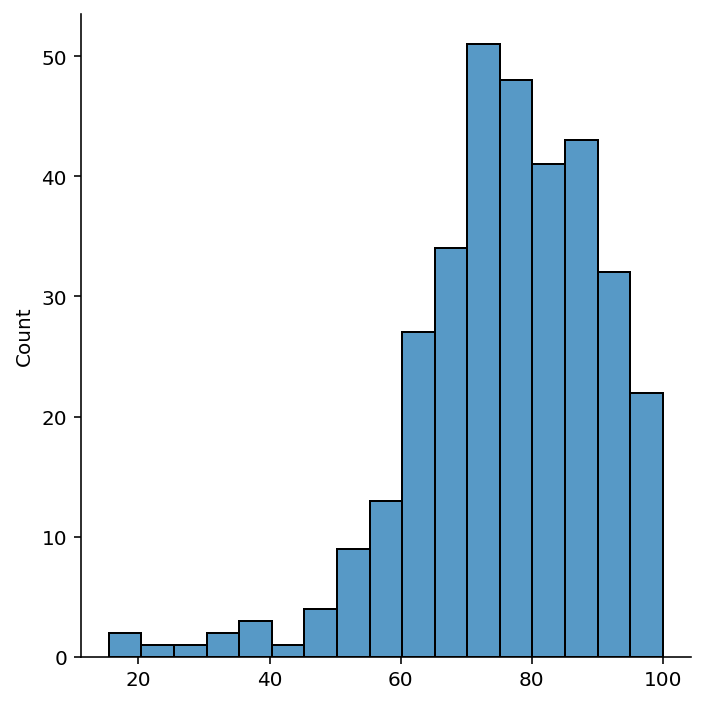

In [82]:
compressions = []
for song in vocab:
    chunks = song.split()
    num_notes = 0
    for ch in chunks:
        num_notes += len(ch.split('+'))
    compressions.append(round(len(chunks)/num_notes*100, 2))
#     print(len(chunks), num_notes, compressions[-1])
    
import seaborn as sns
sns.displot(compressions)

In [90]:
n = mc.note.Note('C4')
n.pitch.ps += 2.0
n.nameWithOctave

'D4'

In [93]:
vocab = {
    ' '.join(["START", *[str(n) for n in ns], "END"]) : {
        "count": 1,
        "id": idx
    }  for ns in notes_intervals
}
print("# unique notes:", len(set(notes_intervals_flat)))
print('# songs:', len(notes_intervals))

num_merges = 200
maxcount = float('inf')

# for i in range(num_merges):
while maxcount > 10:
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)
    
    note = mc.note.Note('C4')
    melody = [note.nameWithOctave]
    for interval in '+'.join(best).split('+'):
        if interval in ['x', 'START', 'END']:
            melody.append(interval)
        else:
            note.pitch.ps += float(interval)
            melody.append(note.nameWithOctave)
        
#     print(' '.join(best), pairs[best])
    print(melody, pairs[best])
    maxcount = pairs[best]
    
# vocab

# unique notes: 51
# songs: 355
['C4', 'D4', 'E-4'] 638
['C4', 'C4', 'C4'] 594
['C4', 'B-3', 'C4'] 505
['C4', 'D4', 'E4'] 445
['C4', 'B-3', 'A3'] 392
['C4', 'x', 'x'] 317
['C4', 'B3', 'A3'] 252
['C4', 'B3', 'C4'] 241
['C4', 'E-4', 'F4'] 218
['C4', 'G3', 'C4'] 209
['C4', 'B3', 'G3'] 194
['C4', 'G4', 'C4'] 175
['C4', 'A3', 'B-3'] 170
['C4', 'A3', 'E3'] 155
['C4', 'B-3', 'G#3', 'G3'] 138
['C4', 'D4', 'G4'] 130
['C4', 'G#3', 'E-3'] 127
['C4', 'C4', 'D4'] 118
['C4', 'B-3', 'G3'] 114
['C4', 'D4', 'E-4', 'F4'] 106
['C4', 'G#3', 'F3'] 105
['C4', 'F4', 'G4'] 103
['C4', 'E-4', 'C4'] 103
['C4', 'G#3', 'B-3'] 101
['C4', 'G#4', 'C4'] 96
['C4', 'G#4', 'F4', 'C4'] 93
['C4', 'C#4', 'E-4'] 92
['C4', 'E-4', 'G#4'] 90
['C4', 'C4', 'C4', 'C4', 'C4'] 90
['C4', 'E4', 'F4'] 88
['C4', 'F4', 'C4'] 84
['C4', 'D4', 'E-4', 'F4', 'G4'] 84
['C4', 'D4', 'E-4', 'G4'] 79
['C4', 'x', 'D4'] 74
['C4', 'G4', 'B-3'] 72
['C4', 'C#4', 'E-4', 'F4'] 72
['C4', 'E-4', 'B-3'] 71
['C4', 'C#4', 'D4'] 66
['C4', 'D4', 'E-4', 'D4', 'C